In [ ]:
### Evaluate the linear regression that you have built, calculate your coefficients, intercept, and the R2 score.



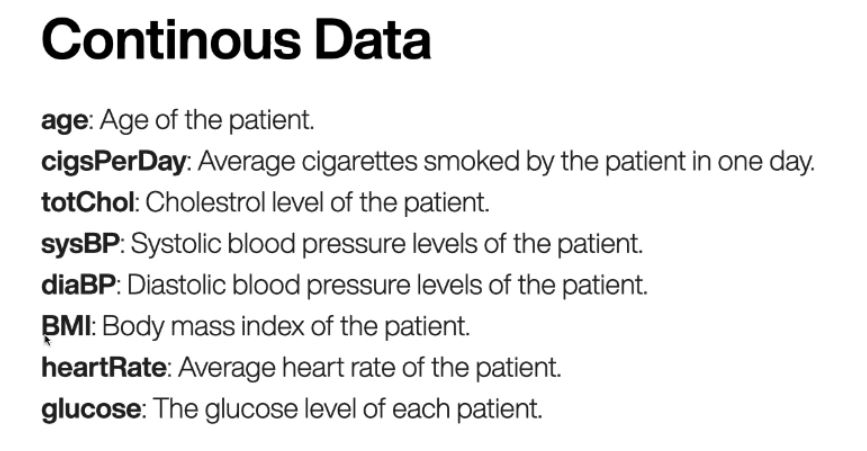

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
from matplotlib import  pyplot as palette

df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/framingham.csv")

# **1. Obtain data**

In [ ]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.sample(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3828,0,52,1.0,1,10.0,0.0,0,0,0,188.0,130.0,71.0,23.88,80.0,89.0,0
4011,1,44,1.0,1,25.0,0.0,0,0,0,254.0,123.0,82.0,24.56,87.0,68.0,0
983,0,40,1.0,0,0.0,0.0,0,0,0,340.0,149.0,81.0,28.46,110.0,99.0,0
3689,1,34,3.0,1,20.0,0.0,0,0,0,155.0,117.5,72.5,23.51,85.0,65.0,0
1380,1,42,NaN,1,30.0,0.0,0,0,0,224.0,127.5,89.0,29.84,79.0,75.0,0
2065,1,54,1.0,1,30.0,0.0,0,1,0,255.0,149.0,86.0,20.12,98.0,65.0,0
2537,1,46,2.0,0,0.0,0.0,0,0,0,226.0,140.0,86.0,31.93,85.0,72.0,0
1683,0,39,1.0,0,0.0,0.0,0,0,0,164.0,112.0,63.0,22.01,60.0,85.0,0
3994,0,54,2.0,1,10.0,0.0,0,1,0,246.0,153.0,80.0,37.30,92.0,74.0,0
2723,1,44,4.0,1,20.0,0.0,0,0,0,225.0,130.0,77.5,21.19,92.0,82.0,0


# **2. Scrub Data**


In [ ]:
df = df.dropna()

#**3. Explore Data**

#### **Continuous Data**
age 

cigsPerDay

totChol

sysBP

diaBP

BMI

heartRate

glucose


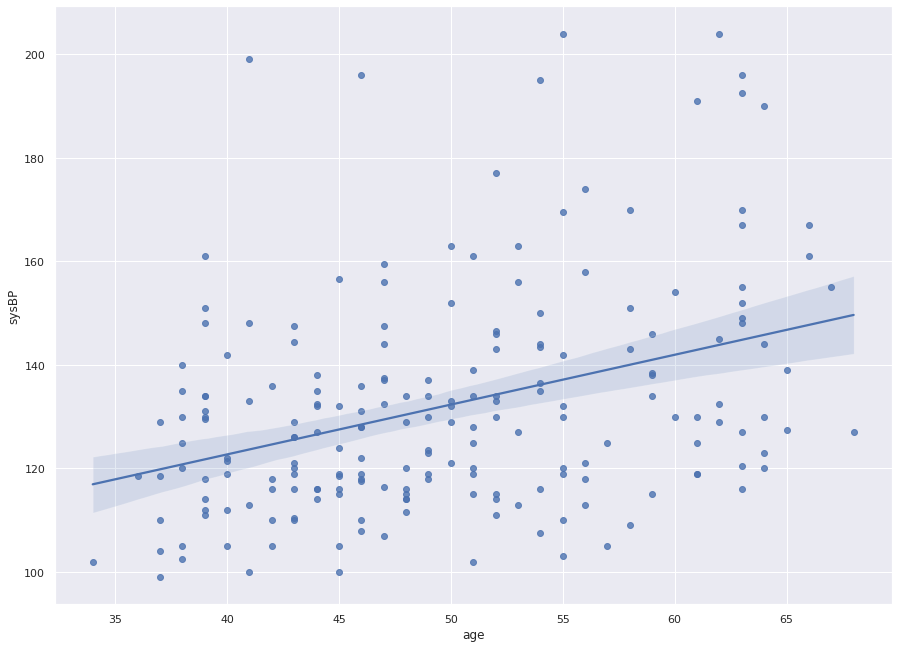

In [ ]:
# age vs sysBP
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="sysBP", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It is look ok and line is matched on the data point.

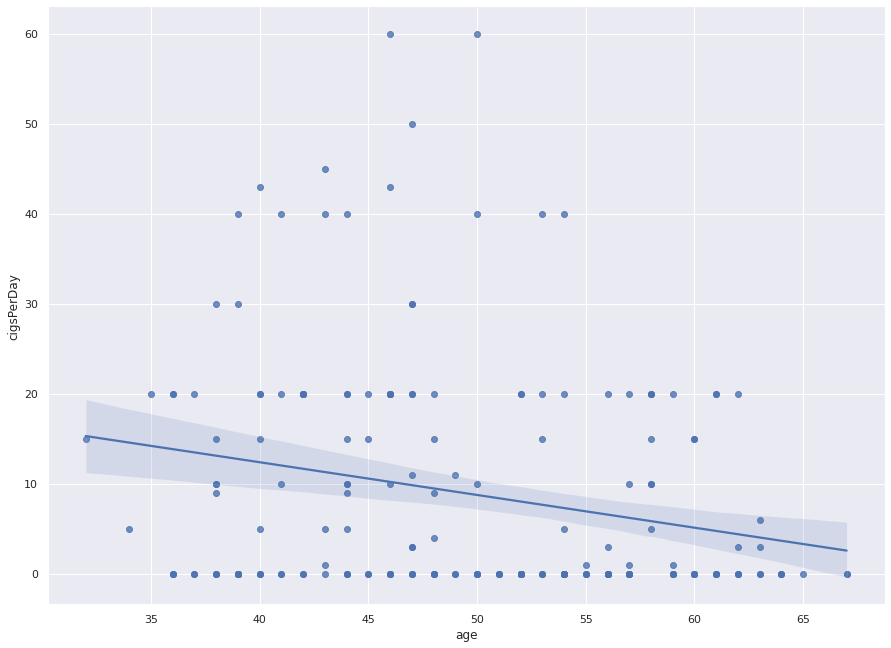

In [ ]:
# age vs cigsPerDay
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="cigsPerDay", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It seem like not ok because the line not really matched on the data point.

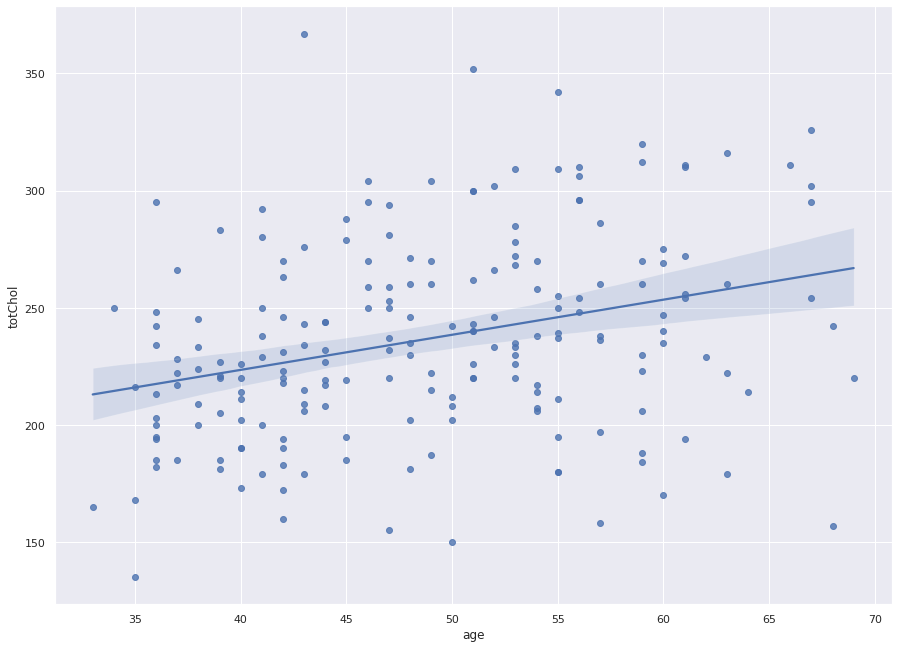

In [ ]:
# age vs totChol
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="totChol", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It is look ok and line is matched on the data point.

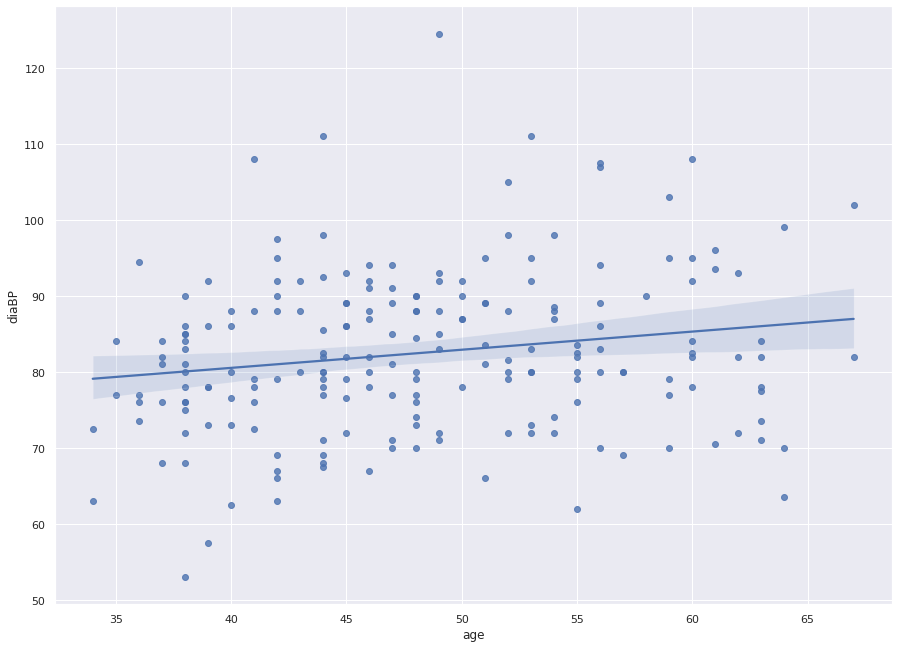

In [ ]:
# age vs diaBP
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="diaBP", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It is look ok and line is matched on the data point.

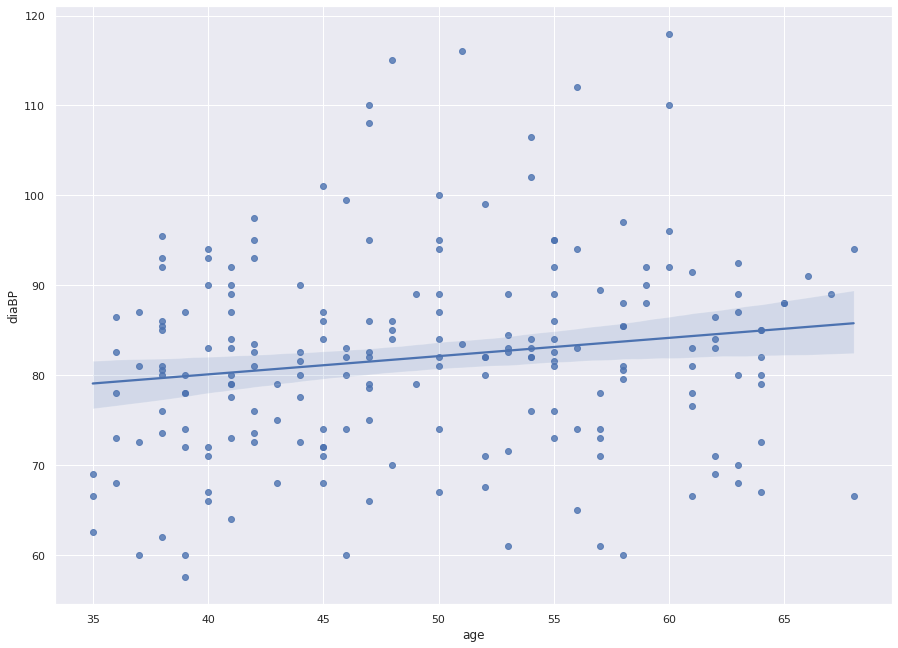

In [ ]:
# age vs BMI
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="diaBP", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It is look ok and line is matched on the data point.

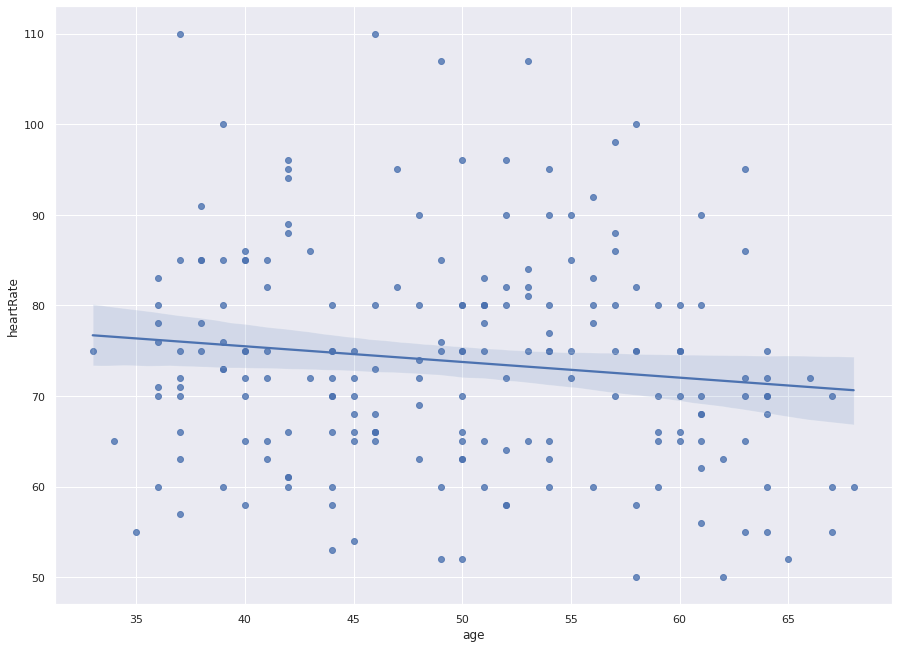

In [ ]:
# age vs heartRate
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="heartRate", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It seem like not ok because the line really not matched on the data point.

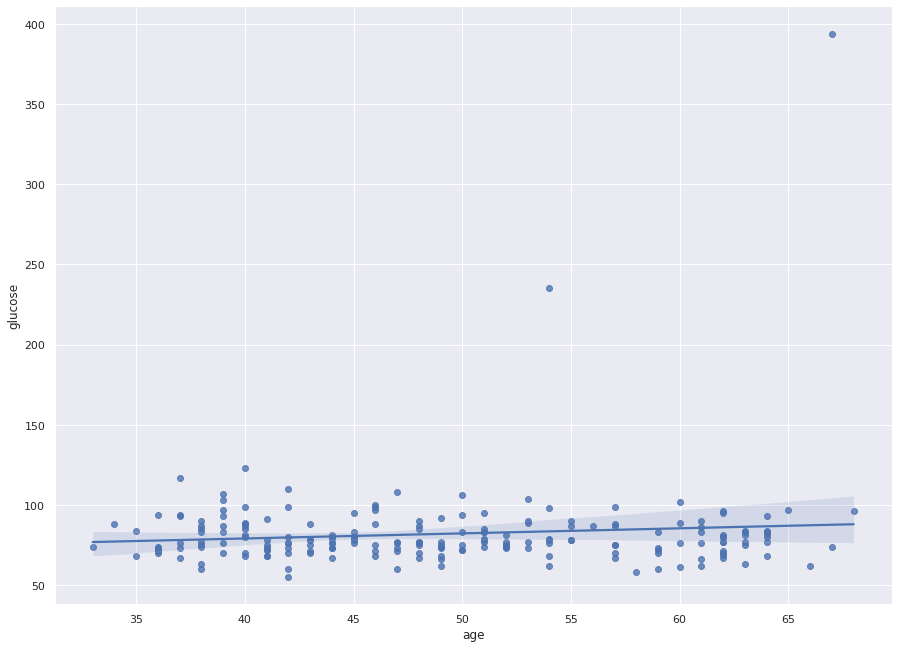

In [ ]:
# age vs glucose
sns.set(rc={'figure.figsize':(15,11)})
g = sns.regplot(x="age", y="glucose", data=df.sample(200))

### **Explanation**
Look at this linear regression chart, It is look ok and line is matched on the data point.

In [ ]:
sns.pairplot(df)

#**4. Modelling**

### 4.1 Modelling > age vs sysBP

In [ ]:
# Predict sysBP using age
features = ['age']
train_data = df[features] 
train_target = df['sysBP']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model [sysBP] R2 score is " + nResult)

The performance of this model [sysBP] R2 score is 14.18 %


### 4.2 Modelling > age vs cigsPerDay

In [ ]:
# Predict cigsPerDay using age
features = ['age']
train_data = df[features] 
train_target = df['cigsPerDay']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[cigsPerDay] R2 score is " + nResult)

The performance of this model[cigsPerDay] R2 score is 4.44 %


### 4.3 Modelling > age vs totChol

In [ ]:
# Predict totChol using age
features = ['age']
train_data = df[features] 
train_target = df['totChol']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[totChol] R2 score is " + nResult)

The performance of this model[totChol] R2 score is 8.52 %


### 4.4 Modelling > age vs diaBP

In [ ]:
# Predict diaBP using age
features = ['age']
train_data = df[features] 
train_target = df['diaBP']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[diaBP] R2 score is " + nResult)

The performance of this model[diaBP] R2 score is 4.61 %


### 4.5 Modelling > age vs BMI

In [ ]:
# Predict BMI using age
features = ['age']
train_data = df[features] 
train_target = df['BMI']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[BMI] R2 score is " + nResult)

The performance of this model[BMI] R2 score is 2.83 %


### 4.6 Modelling > age vs heartRate

In [ ]:
# Predict heartRate using age
features = ['age']
train_data = df[features] 
train_target = df['heartRate']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[heartRate] R2 score is " + nResult)

The performance of this model[heartRate] R2 score is -0.02 %


### 4.7 Modelling > age vs glucose

In [ ]:
# Predict glucose using age
features = ['age']
train_data = df[features] 
train_target = df['glucose']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)

nResult = model.score(test_X, test_y)
nResult = "{:.2f} %".format(nResult * 100)

print("The performance of this model[glucose] R2 score is " + nResult)

The performance of this model[glucose] score is 1.88 %


### **Prediction Outcome using different set of feature data**

The performance of this model [sysBP] R2 score is 15.06 %

The performance of this model[cigsPerDay] R2 score is 4.44 %

The performance of this model[totChol] R2 score is 8.52 %

The performance of this model[diaBP] R2 score is 4.61 %

The performance of this model[BMI] R2 score is 2.83 %

The performance of this model[heartRate] R2 score is -0.02 %

# **Predict sysBP using age**

The reason I using this model is because the performance of the score is the highest among other feature data.

In [ ]:
# Predict sysBP using age
features = ['age']
train_data = df[features] 
train_target = df['sysBP']  

train_X, test_X, train_y,  test_y = train_test_split(train_data, train_target, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)


LinearRegression()

In [ ]:
#Test cases 1
# Predict sysBP using age when 15
nX1 = 15
fncCalculate(nX1)

1.Predict sysBP using age when 15 is 97.84
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 15 is 97.84 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Test cases 2
# Predict sysBP using age when 25
nX1 = 25
fncCalculate(nX1)

1.Predict sysBP using age when 25 is 107.87
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 25 is 107.87 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Test cases 3
# Predict sysBP using age when 35
nX1 = 35
fncCalculate(nX1)

1.Predict sysBP using age when 35 is 117.9
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 35 is 117.90 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Test cases 4
# Predict sysBP using age when 45
nX1 = 45
fncCalculate(nX1)

1.Predict sysBP using age when 45 is 127.92
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 45 is 127.92 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Test cases 5
# Predict sysBP using age when 55
nX1 = 55
fncCalculate(nX1)

1.Predict sysBP using age when 55 is 137.95
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 55 is 137.95 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Test cases 6
# Predict sysBP using age when 65
nX1 = 65
fncCalculate(nX1)

1.Predict sysBP using age when 65 is 147.98
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 65 is 147.98 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
def fncCalculate(nX1):  
  #nX1 = 65
  nResult = model.predict([[nX1]])
  Result = round(nResult[0], 2)  
  print ("1.Predict sysBP using age when " + str(nX1) + " is " + str(Result))
  #
  arrcoef = model.coef_
  ncoef = arrcoef[0]
  print("2. coefficients is " + str(ncoef))

  nintercept = model.intercept_
  print("3. intercept is " + str(nintercept))

  nEquation = (ncoef * nX1) + nintercept
  nEquation = "{:.2f} ".format(nEquation)

  print ("4. Predicted value (y) using Equation when age = " + str(nX1) + " is " + str(nEquation))  


#**5. Interpret**

Based on linear regresssion prediction, the higher age it is, the higher sysBP will facing. 


From the 6 test cases which I have tested fore pediction, the outcome as following
1. Predict sysBP using age when 15 is 97.84

2. Predict sysBP using age when 25 is 107.87

3. Predict sysBP using age when 35 is 117.9

4. Predict sysBP using age when 45 is 127.92

5. Predict sysBP using age when 55 is 137.95

6. Predict sysBP using age when 65 is 147.98


**Outcome of coefficients and intercept**
1. Predict sysBP using age when 15 is 97.84
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 15 is 97.84 


1. Predict sysBP using age when 25 is 107.87
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 25 is 107.87 


1. Predict sysBP using age when 35 is 117.9
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 35 is 117.90 


1. Predict sysBP using age when 45 is 127.92
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 45 is 127.92 


1. Predict sysBP using age when 55 is 137.95
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 55 is 137.95 


1. Predict sysBP using age when 65 is 147.98
2. coefficients is 1.0027907325426302
3. intercept is 82.799193771029
4. Predicted value (y) using Equation when age = 65 is 147.98 
